Jump Search: 
Best time -  0.0
Worst time -  0.015625
Avarage time -  0.00021875

Exponential Search:
Best time -  0.0
Worst time -  0.015625
Avarage time -  0.00021875

Memory Usage: 93.401088


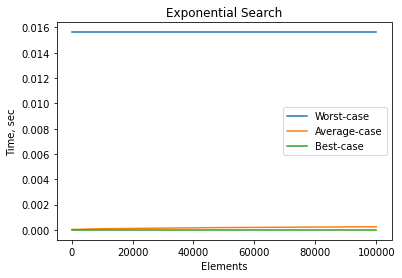

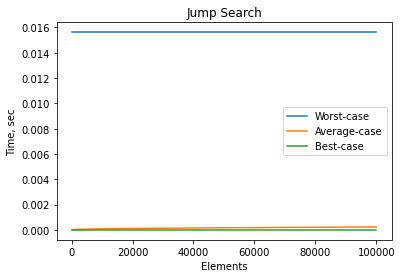

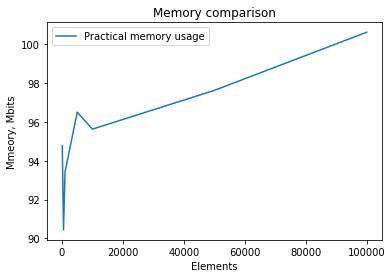

In [16]:
import numpy as np
from time import process_time 
import os, psutil, math
import matplotlib.pyplot as plt
import copy
from numpy import random
import numpy as np
Number=100000
t1 = 0
A = np.arange(1,Number+1,1)

#print(x)
process = psutil.Process(os.getpid())


def jumpSearch( arr , x , n ):
    step = math.sqrt(n)
    prev = 0
    while arr[int(min(step, n)-1)] < x:
        prev = step
        step += math.sqrt(n)
        if prev >= n:
            return -1
        
    while arr[int(prev)] < x:
        prev += 1
        if prev == min(step, n):
            return -1
    if arr[int(prev)] == x:
        return prev
    return -1

def exponentialSearch(arr, n, x):
    if arr[0] == x:
        return 0
    i = 1
    while i < n and arr[i] <= x:
        i = i * 2
    return binarySearch( arr, i / 2, min(i, n-1), x)
   
    
def binarySearch(array, x, low, high):
    while low <= high:
        mid = low + (high - low)//2
        if array[mid] == x:
            return mid
        elif array[mid] < x:
            low = mid + 1
        else:
            high = mid - 1
            return -1
    
def main():
    
    best=100000
    worst=0
    Total=0
    

    
    for i in range(1000):
        t1_start = process_time()
        
        index = jumpSearch(A, random.randint(Number), len(A))
            
        t1_stop = process_time()
        t=t1_stop-t1_start
        if (t<best): best=t
        if (t>worst): worst=t
        Total+=t
    print("Jump Search: ")
    print("Best time - ",best)
    print("Worst time - ",worst)
    print("Avarage time - ",Total/1000)
    print()
    
    for i in range(1000):
        t1_start = process_time()
        
        result =  exponentialSearch(A, len(A), random.randint(Number))
            
        t1_stop = process_time()
        t=t1_stop-t1_start
        if (t<best): best=t
        if (t>worst): worst=t
        Total+=t
    print("Exponential Search:")
    print("Best time - ",best)
    print("Worst time - ",worst)
    print("Avarage time - ",Total/1000)
    print()
    
main()

#Exponential Search
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot([100,500,1000,5000,10000,50000,100000], [0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625], label='Worst-case')  
ax.plot([100,500,1000,5000,10000,50000,100000], [3.1e-05,4.6e-05,3.1e-05,6.3e-05,9.375e-05,0.0001875,0.00025], label='Average-case')  
ax.plot([100,500,1000,5000,10000,50000,100000], [0,0,0,0,0,0,0], label='Best-case')
ax.set_xlabel('Elements')
ax.set_ylabel('Time, sec')
ax.set_title("Exponential Search")
ax.legend()

#Jump Search
fig, ay = plt.subplots()  # Create a figure and an axes.
ay.plot([100,500,1000,5000,10000,50000,100000], [0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625], label='Worst-case')  
ay.plot([100,500,1000,5000,10000,50000,100000], [1.5e-05,3.1e-05,3.1e-05,6.3e-05,9.375e-05,0.000171875,0.000234375], label='Average-case')  
ay.plot([100,500,1000,5000,10000,50000,100000], [0,0,0,0,0,0,0], label='Best-case')
ay.set_xlabel('Elements')
ay.set_ylabel('Time, sec')
ay.set_title("Jump Search")
ay.legend()


#Memory comparison
k = np.linspace(0, 100000, 100)
fig, ak = plt.subplots()  # Create a figure and an axes.
#ak.plot(k, k, label='Experimental memory usage')  # Plot some data on the (implicit) axes.
ak.plot([100,500,1000,5000,10000,50000,100000], [94.777344,90.435584,93.417472,96.505856,95.633408,97.632256,100.630528], label='Practical memory usage')  # etc.
ak.set_xlabel('Elements')
ak.set_ylabel('Mmeory, Mbits')
ak.set_title("Memory comparison")
ak.legend()

#-------------------------------------
print("Memory Usage:", (process.memory_info().rss/1000000))  # in Mbits
    
